<a href="https://colab.research.google.com/github/maddara88/Deep_Learning_Project_Work/blob/main/Ensemble_Models_on_DogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

In [2]:
resnet = tf.keras.applications.ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [3]:
resnet.input_shape

(None, 224, 224, 3)

In [4]:
resnet.output_shape

(None, 1000)

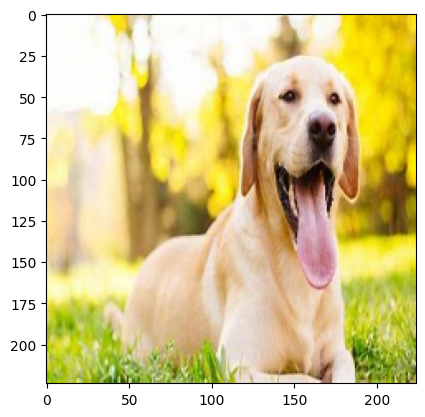

In [6]:
image = cv2.imread("dog.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGBA)
image = cv2.resize(image,(224,224))
plt.imshow(image)

In [7]:
image = np.squeeze(image[:, :, :3])

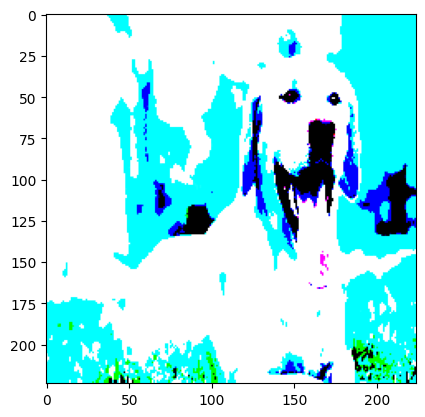

In [8]:
image = tf.keras.applications.resnet50.preprocess_input(image)
plt.imshow(image)

In [9]:
image.shape

(224, 224, 3)

In [10]:
image = np.expand_dims(image,axis = 0)

In [11]:
result = resnet.predict(image) # 1000 prob

1/1 [==============================] - 9s 9s/step


In [12]:
np.argmax(result) # 267 index has the highest prob, what class is this ? 

208

In [13]:
tf.keras.applications.resnet50.decode_predictions(result)

35363/35363 [==============================] - 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.4338682),
  ('n02109047', 'Great_Dane', 0.18651381),
  ('n02092339', 'Weimaraner', 0.14604804),
  ('n02099601', 'golden_retriever', 0.10962126),
  ('n02087394', 'Rhodesian_ridgeback', 0.0466261)]]

In [14]:
# Inception, Resnet, VGG, EfficientNet
# list of all Pre Trained Models - https://keras.io/api/applications/

In [15]:
resnet_no_top_layer = tf.keras.applications.ResNet50(include_top =False, input_shape= (224,224,3) )

94765736/94765736 [==============================] - 0s 0us/step


In [16]:
resnet_no_top_layer.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

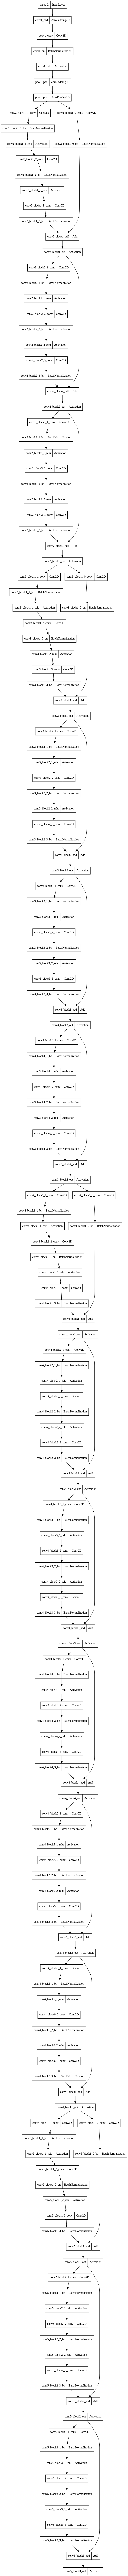

In [17]:
tf.keras.utils.plot_model(resnet_no_top_layer)

In [18]:
vgg_no_top_layer = tf.keras.applications.VGG16(include_top= False, input_shape = (224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
vgg_no_top_layer.output_shape

(None, 7, 7, 512)

In [20]:
resnet_no_top_layer.output_shape

(None, 7, 7, 2048)

In [21]:
vgg_no_top_layer.input_shape

(None, 224, 224, 3)

In [22]:
resnet_no_top_layer.input_shape

(None, 224, 224, 3)

In [23]:
import kaggle

OSError: ignored

In [24]:
! mv kaggle.json /root/.kaggle

In [25]:
import kaggle

In [26]:
! kaggle competitions download -c dog-breed-identification

 99% 681M/691M [00:07<00:00, 125MB/s] 
100% 691M/691M [00:07<00:00, 101MB/s]


In [27]:
! unzip -q dog-breed-identification.zip

In [28]:
# All images are in train folder
# and we also have a labels.csv imageName --> Label

In [29]:
label = pd.read_csv("labels.csv")

In [30]:
label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [31]:
label["filename"] = label["id"] + ".jpg"

In [32]:
label.head()

,id,breed,filename
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,0021f9ceb3235effd7fcde7f7538ed62.jpg


In [33]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.1,rotation_range = 0.3,horizontal_flip = True)

In [34]:
train_idg = idg.flow_from_dataframe(label,directory = "train/",x_col = "filename",y_col = "breed",
                                    target_size = (224,224),batch_size = 64,subset = "training")

Found 9200 validated image filenames belonging to 120 classes.


In [35]:
val_idg = idg.flow_from_dataframe(label,directory = "train/",x_col = "filename",y_col = "breed",
                                    target_size = (224,224),batch_size = 64,subset = "validation")

Found 1022 validated image filenames belonging to 120 classes.


In [36]:
# How to stop Overfitting? DropOut 

In [37]:
#Input_Layer
input = tf.keras.layers.Input((224,224,3),name = "input_layer")

# VGG 
# PreProcessing Layer (2)
vgg_pre_process = tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, name = "VGGPREPROCESS") (input)

# Download the model # This is NOT a layer just a download of model
vgg_model  = tf.keras.applications.VGG16(include_top = False,input_shape = (224,224,3))
vgg_model.trainable = False #we do not intend to change the VGG weights

#VGG layer(3)
vgg = vgg_model (vgg_pre_process)

#Global Average Pooling
vgg_avg = tf.keras.layers.GlobalAveragePooling2D(name = "VGGGlobalAvgPool") (vgg)


#resnet
resnet_pre_process = tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input,name = "ResnetPreProcess") (input)

#Download Resnet Model
resnet_model = tf.keras.applications.ResNet50(include_top = False,input_shape = (224,224,3))
resnet_model.trainable = False #we do not intend to change the resnet weights 

#resnet layer(3)
resnet = resnet_model (resnet_pre_process)

#Global Average Pooling
resnet_avg = tf.keras.layers.GlobalAveragePooling2D(name = "resnetGlobalAvgPool") (resnet)

concat = tf.keras.layers.Concatenate(name = "concatLayer") ([vgg_avg,resnet_avg])
dropout = tf.keras.layers.Dropout(0.5,name = "DropOut") (concat)
dense = tf.keras.layers.Dense(256,activation = "relu",name = "Dense") (dropout)
output = tf.keras.layers.Dense(120, activation = "softmax",name = 'Output_Layer') (dense)

In [38]:
final_model = tf.keras.models.Model(inputs = [input],outputs = [output])


In [39]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 VGGPREPROCESS (Lambda)         (None, 224, 224, 3)  0           ['input_layer[0][0]']            
                                                                                                  
 ResnetPreProcess (Lambda)      (None, 224, 224, 3)  0           ['input_layer[0][0]']            
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['VGGPREPROCESS[0][0]']      

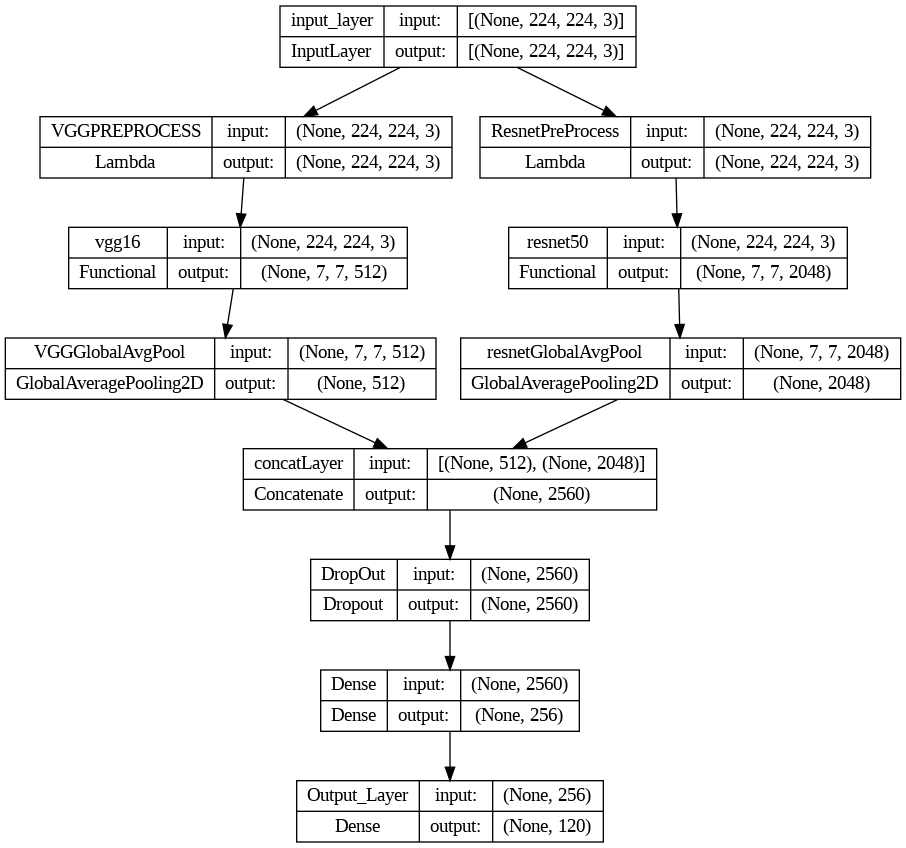

In [40]:
tf.keras.utils.plot_model(final_model,show_shapes = True)

In [41]:
final_model.compile(optimizer = tf.keras.optimizers.SGD(),loss = tf.keras.losses.categorical_crossentropy,
                    metrics = ["acc"])

In [42]:
final_model.fit(train_idg,batch_size = 64,epochs = 10, validation_data = val_idg)

Epoch 1/10
144/144 [==============================] - 188s 1s/step - loss: 4.8415 - acc: 0.0729 - val_loss: 3.6431 - val_acc: 0.2035
Epoch 2/10
144/144 [==============================] - 155s 1s/step - loss: 3.3286 - acc: 0.2171 - val_loss: 2.3512 - val_acc: 0.4051
Epoch 3/10
144/144 [==============================] - 154s 1s/step - loss: 2.6040 - acc: 0.3302 - val_loss: 1.8553 - val_acc: 0.4873
Epoch 4/10
144/144 [==============================] - 154s 1s/step - loss: 2.1739 - acc: 0.4157 - val_loss: 1.5882 - val_acc: 0.5440
Epoch 5/10
144/144 [==============================] - 154s 1s/step - loss: 1.9468 - acc: 0.4540 - val_loss: 1.3876 - val_acc: 0.5881
Epoch 6/10
144/144 [==============================] - 155s 1s/step - loss: 1.7344 - acc: 0.5084 - val_loss: 1.3134 - val_acc: 0.6155
Epoch 7/10
144/144 [==============================] - 151s 1s/step - loss: 1.6079 - acc: 0.5384 - val_loss: 1.2459 - val_acc: 0.6292
Epoch 8/10
144/144 [==============================] - 152s 1s/step - 